<a href="https://colab.research.google.com/github/isadora-oa/imersao-dados-desafio-final/blob/main/Notebooks/Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dados

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression='zip')
mapa = {'droga' : 'composto'}
dados.columns = dados.columns.str.replace('-', '')
dados.rename(columns=mapa, inplace=True)
dados

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

### Comandos

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']] , [dados['tratamento']])
#Agragador que imprime uma tabela de frequência, para a tabela geral(todos os genes e tipos celulares)

#Outros agregadores: pd.melt(), concatenado., aggfunc=''

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']] , [dados['tratamento']] , normalize='index')   #Em porcentagem
                                                                      #'index' ou True

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']] , [dados['tratamento']] , normalize='columns')
#Normaliza através da(s) coluna(s)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [ ]:
#Outra forma de gerar estas mesmas tabelas, concatenado (groupby)

#definição das variáveis:
com_controle = dados[dados['tratamento']=='com_controle'].groupby(['dose','tempo']).count()['tratamento']
com_droga = dados[dados['tratamento']=='com_droga'].groupby(['dose','tempo']).count()['tratamento']

#fórmulas:
concatenado = pd.concat([com_controle,com_droga], axis=1)
concatenado.columns = ['com_controle','com_droga']  #altera o nome das colunas

concatenado

com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
concatenado.div(concatenado.sum(axis=1),axis=0)  #normaliza os valores

com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']] , [dados['tratamento']] , values=dados['g0'], aggfunc='mean')
#Valores para um dado (gene ou tipo celular) específico, no caso o g0

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

### Gráfico g0 x g3

In [ ]:
dados[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


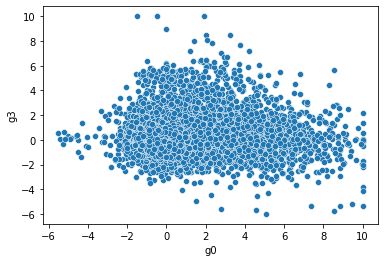

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=dados, x='g0', y='g3')
plt.show()

### Gráficos g0 x g8

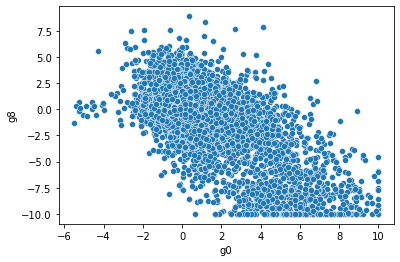

In [ ]:
import matplotlib.pyplot as plt

sns.scatterplot(data=dados, x='g0', y='g8')
plt.show()

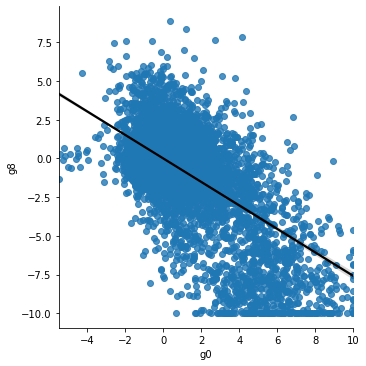

In [ ]:
import matplotlib.pyplot as plt

sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color': 'black'})
#Com linha de tendência
plt.show()

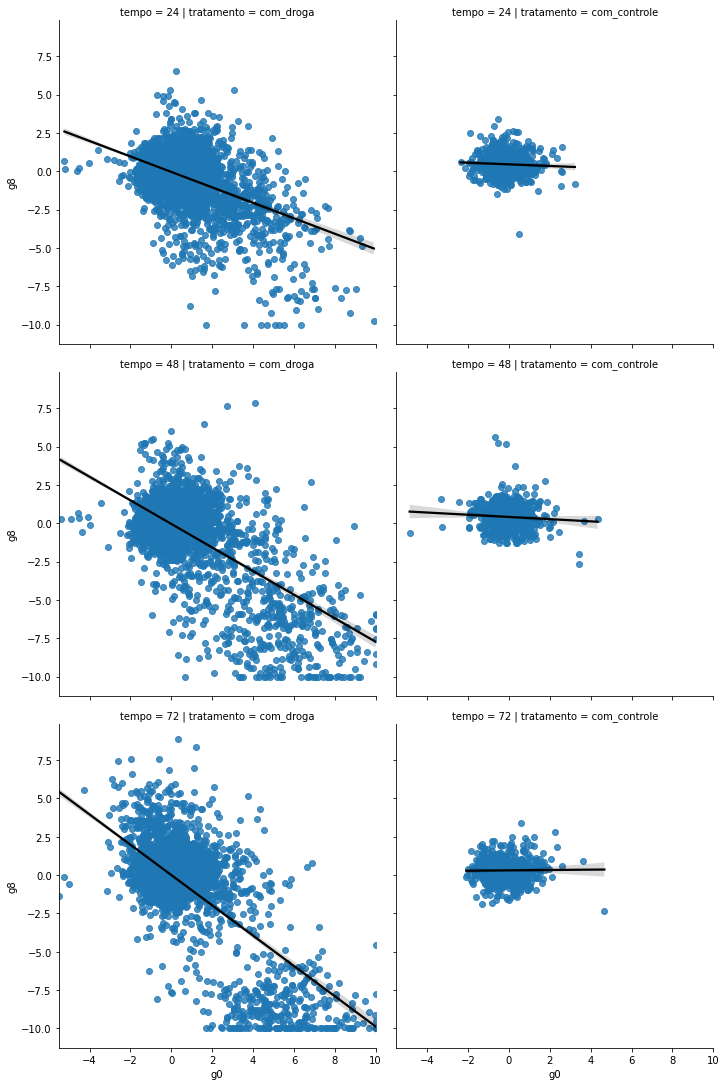

In [ ]:
import matplotlib.pyplot as plt
#Adicionados mais parâmetros, para plotar somente os dados referentes ao tratamento
sns.lmplot(data=dados, x='g0', y='g8', col='tratamento', row='tempo', line_kws={'color': 'black'})
#                      Dados da tabela:   |coluna           |linha
plt.show()

### **Correlação entre os dados** 

---

*   *Valores próximos de -1 ou +1 indicam variáveis altamente correlacionadas;*
*   *Valores próximos de 0 indicam variáveis não corrrelacionadas;*
*   *Quando os valores são negativos (próximos de -1) as variáveis são inversamente correlacionadas, ou seja, enquanto uma aumenta a outra diminui proporcionalmente;*
*   *Quando os valores são positivos (próximos de +1) as variáveis são diretamente correlacionadas, ou seja, ambas diminuem/aumentam proporcionalmente;*

*A alta ou baixa correlação não implica necessariamente na causalidade do evento. É preciso analisar outros fatores para se chegar a uma conlcusão sobre a causalidade.*

In [ ]:
dados.loc[:, 'g0':'g771'].corr()
#Correlaciona todos os parâmetros (tratamento, tempo, composto e dose) de todos os genes

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

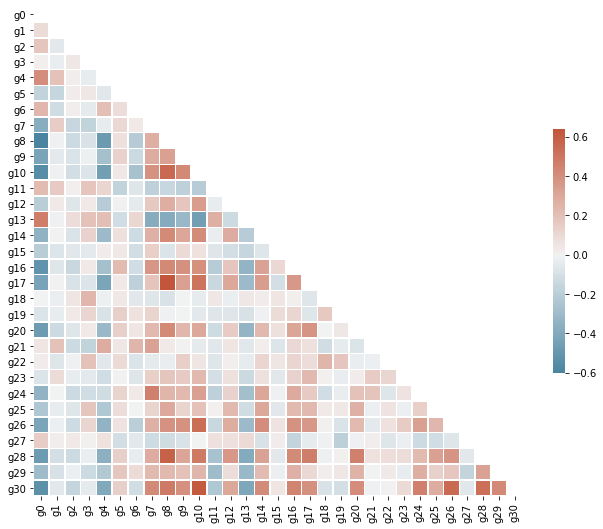

In [ ]:
#Código copiado do Seaborn: 'https://seaborn.pydata.org/examples/many_pairwise_correlations.html'

import numpy as np

corr = dados.loc[:, 'g0': 'g30'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, #vmax=.3,(alteração relacionada com a escala do gráfico)
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
dados.loc[:, 'c0':'c99'].corr()  #Para os tipos celulares

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
c0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,...,0.839605,0.846656,0.851796,0.797634,0.820904,0.806811,0.845954,0.825661,0.833020,0.812924,0.814969,0.837019,0.845174,0.847267,0.723442,0.845666,0.761470,0.791360,0.840550,0.812687,0.839668,0.825544,0.844675,0.852891,0.836344,0.859314,0.817635,0.787650,0.838987,0.827124,0.835217,0.832529,0.799196,0.817657,0.846457,0.815499,0.845579,0.834513,0.800682,0.777426
c1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,...,0.875778,0.823214,0.889565,0.868589,0.840502,0.856425,0.869802,0.886129,0.834581,0.814084,0.869416,0.826417,0.861290,0.851737,0.725885,0.884601,0.830345,0.846593,0.837897,0.844521,0.842983,0.885487,0.868565,0.870559,0.875755,0.874084,0.818480,0.793513,0.838070,0.811761,0.875405,0.839236,0.876519,0.868431,0.886750,0.803637,0.871383,0.866084,0.815952,0.781510
c2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,...,0.897347,0.848344,0.898224,0.887169,0.853978,0.874032,0.894848,0.892008,0.857836,0.838323,0.877652,0.849427,0.891245,0.890797,0.738358,0.892939,0.832679,0.858314,0.866675,0.858469,0.871477,0.899199,0.892636,0.887700,0.896144,0.891606,0.844756,0.800533,0.853413,0.835940,0.902964,0.872660,0.883866,0.885419,0.906584,0.837420,0.898270,0.874869,0.839640,0.802032
c3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,...,0.810208,0.797311,0.835446,0.817884,0.810944,0.788175,0.835219,0.813661,0.805820,0.794756,0.782965,0.806491,0.840010,0.824398,0.702892,0.823897,0.765937,0.802952,0.800673,0.803913,0.813930,0.835707,0.819130,0.813694,0.834414,0.819223,0.808987,0.772220,0.811936,0.796889,0.825342,0.813555,0.812200,0.803603,0.830301,0.799760,0.822001,0.814889,0.779998,0.768872
c4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,...,0.885975,0.837735,0.888442,0.900435,0.839403,0.862301,0.903555,0.885107,0.860831,0.835481,0.859855,0.850158,0.881167,0.893576,0.740225,0.882419,0.847703,0.847125,0.856590,0.862995,0.862491,0.903756,0.902625,0.879256,0.893951,0.882537,0.839999,0.779533,0.843129,0.816772,0.895967,0.890255,0.882185,0.868684,0.900309,0.839111,0.901603,0.873534,0.834823,0.795218
...,...,...,...,...,...,...,...,...,...,...,...,..

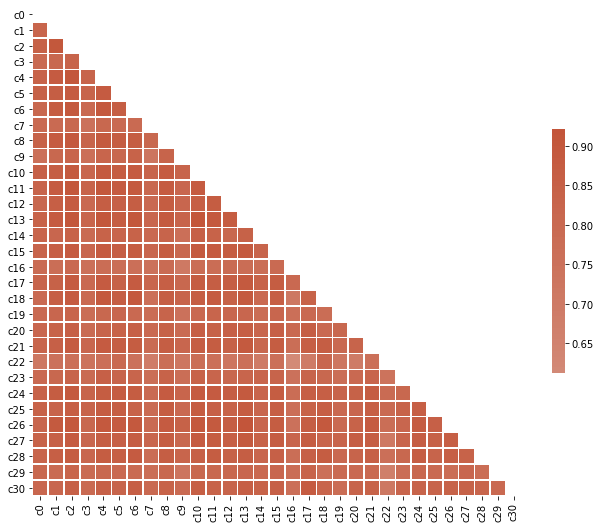

In [ ]:
import numpy as np

corr = dados.loc[:, 'c0': 'c30'].corr()  #Seleciona quais dados plotar no gráfico
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

***Os tipos celulares*** influenciam na sobrevivência do organismo e ***estão correlacionados***, ou seja, se um tipo celular for afetado ou não provavelmente os demais também terão os mesmo compotamento, como mostra o gráfico 'nome no gráfico'.

In [ ]:
corr_gc = dados.loc[:,'g0':'c99'].corr()  #Para genes(g) e tipos celulares(c)

corr_gc

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,-0.662186,-0.639153,-0.665249,-0.604982,-0.621192,-0.646914,-0.630096,-0.625521,-0.643556,-0.622139,-0.655613,-0.637361,-0.669361,-0.666255,-0.541994,-0.660842,-0.540702,-0.647280,-0.670072,-0.592806,-0.644508,-0.577032,-0.621314,-0.673295,-0.588529,-0.660818,-0.625025,-0.625130,-0.627185,-0.682893,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.040883,-0.027389,-0.013518,-0.005513,0.004970,0.000605,0.005983,-0.025452,-0.014658,-0.016301,-0.035473,0.004021,-0.041172,-0.023066,0.004179,-0.020136,0.023721,-0.003363,-0.044079,0.006385,-0.004805,-0.010185,0.002633,-0.022321,-0.018388,-0.020843,-0.016555,0.011173,-0.037424,-0.008322,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,-0.179885,-0.183319,-0.185323,-0.174439,-0.163617,-0.174381,-0.185913,-0.166461,-0.181092,-0.167242,-0.180925,-0.178400,-0.175939,-0.182079,-0.151960,-0.183145,-0.181286,-0.159720,-0.179919,-0.162542,-0.183613,-0.170641,-0.186154,-0.177631,-0.166103,-0.187158,-0.157164,-0.170382,-0.164975,-0.174041,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,-0.115228,-0.037189,-0.077496,-0.060176,-0.026180,-0.099132,-0.026693,-0.060265,-0.036769,-0.045193,-0.140946,-0.026295,-0.076285,-0.055792,-0.035812,-0.078715,-0.050296,-0.071568,-0.078478,-0.046407,-0.033641,-0.064704,-0.044155,-0.083462,-0.028035,-0.063797,-0.039701,0.010285,-0.047301,-0.066781,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,-0.399687,-0.402933,-0.360525,-0.335792,-0.392328,-0.365328,-0.358876,-0.379927,-0.393416,-0.380265,-0.378893,-0.396324,-0.407893,-0.396741

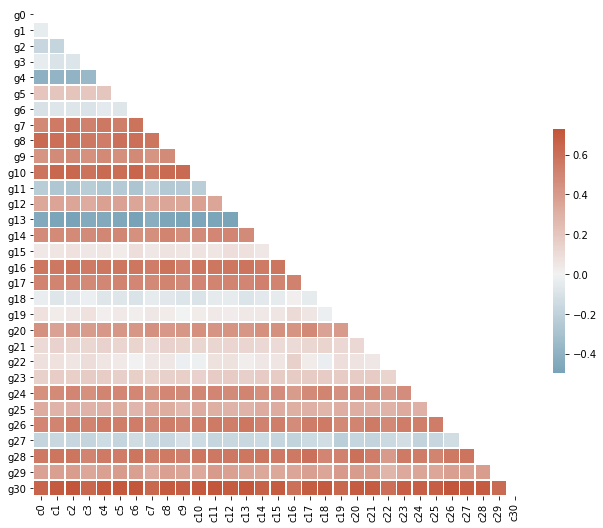

In [ ]:
import numpy as np

corr = corr_gc.loc['g0':'g30','c0':'c30']
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()